## **Comparing Maximum and Average Bidding: An A/B Test in Facebook Ads**
<hr style="margin-bottom: 15px;">


                        
![facebook ads gif](https://i.imgur.com/U4QWJjq.gif)

<a id='intro'></a>

In this project, we explore the field of Facebook advertising to carry out a statistical A/B test, with a specific focus on the evaluation of two bidding strategies: maximum bidding (Max) and average bidding (Avg). The dataset utilized for this analysis can be obtained from [Kaggle](https://www.kaggle.com), under the title [Optimizing Ad Bidding: Facebook's A/B Test Story](https://kaggle.com/datasets/furth3r/facebook-ab-test-of-bidding-feature)

The core of this project centers around the A/B test, a statistical technique enabling a direct comparison between two groups. In this context, our focus is on examining the impact of two different bidding strategies in Facebook advertising. The control group employs maximum bidding (Max), a manual approach where advertisers establish a fixed maximum bid. Conversely, the test group adopts average bidding (Avg), an automated method in which Facebook's algorithm adaptively adjusts bids in response to real-time auction dynamic. For further reading, you can visit the official [Meta Ads Auction](https://web.facebook.com/business/ads/ad-auction?_rdc=1&_rdr) page

The main goal of this project is to carefully assess and compare how well maximum and average bidding strategies perform in real world of Facebook advertising. Our objective is to figure out which strategy delivers better results and is more in line with what advertisers aim to achieve

> **Disclaimer:** The data and analysis provided in this project are intended for educational and personal learning purposes only
>


### Table of Contents

- [Introduction ~](#intro)
- [Questions ~](#question)
- [How to run the code ~](#runcode)
- [Downloading the Dataset ~](#download)
- [Create the Dataframes ~](#dataframe)
- [Data cleaning and wrangling ~](#clean)
- [Data Exploration and Descriptive Analysis ~](#eda)
- [A/B Testing ~](#ab)
- [Key Takeaways ~](#takeaway)
- [References ~](#reference)

<a id='question'></a>
### Questions ~
Here are the questions we aim to answer in this project:

1. **Do different bidding strategies yield varying results in terms of impressions, ad-clicks, purchases, and earnings?**
2. **If so, which bidding strategy produces the most favorable outcomes?**
3. **Are the results statistically significant, thereby providing valuable insights for decision-making?**

<a id='runcode'></a>
### How to run the code ~

To run this project, there are several ways that you can choose between running it on your local computer using [Jupyter Notebook]() or using online resources like [Kaggle](https://www.kaggle.com) or [GoogleCollab](https://colab.research.google.com)

**Option 1: Using online resources(recommended)**:
- This is the easiet way since you only need to click the 'Run' button
- You can choose between [GoogleCollab](https://colab.research.google.com/) or [Kaggle](https://www.kaggle.com), but first you need to have an account before you upload and execute the code on those platform
  

**Option 2: Running on you local computer**:
- You need to set up Python, install the [Jupyter Notebook](https://jupyter.org/) and install the list of required libraries within your IDE
> **Jupyter Notebooks**: [Jupyter notebook](https://jupyter.org) is a document made of *cells*. Each cell can contain code written in Python or explanations in plain English. You can execute code cells and view the results, numbers, messages, graphs, tables, files, etc., instantly within the notebook. Jupyter is a powerful platform for experimentation and analysis. You can use the "Kernel > Restart & Clear Output" menu option to clear all outputs and start again from the top

Here's a list of tools or libraries that we're going to install and use:

In [ ]:
%pip install pandas --quiet
%pip install numpy --quiet
%pip install matplotlib --quiet
%pip install seaborn --quiet

For starter, let's start with importing the libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import opendatasets as od
from datetime import datetime, timedelta
import random
import viz

%config InlineBackend.figure_format = 'svg'

<a id='download'></a>
### Downloading the Datasets ~

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL
- Use a helper library, e.g., [`opendatasets`](https://github.com/JovianML/opendatasets), which contains a collection of curated datasets and provides a helper function for direct download

**Required Dataset (Kaggle):**
   - For the required datasets, you'll find it on [Kaggle](https://www.kaggle.com/)
   - If you haven't already, make sure you have a Kaggle account. You can create one if needed
   - After logging in, go to your Kaggle account settings by clicking on "Settings" in the top right corner of the Kaggle website
   - In the account settings, navigate to "Account" and then click on "Create New API Token." This will provide you with an API key

> Please ensure you've acquired the API key from Kaggle as mentioned above before proceeding to download the datasets



Let's download the dataset

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/furth3r/facebook-ab-test-of-bidding-feature/'

od.download(dataset_url)

<a id='dataframe'></a>
### Create the Dataframes ~

We create our dataframe with ``pandas``:
   - As our dataset is in ``CSV`` format, let's use pandas `read_csv` function to create the dataframe

In [2]:
# Create control_df and test_df from the downloaded dataset
control_df = pd.read_csv('facebook-ab-test-of-bidding-feature/ab_test/control_group.csv', sep=',')
test_df = pd.read_csv('facebook-ab-test-of-bidding-feature/ab_test/test_group.csv', sep=',')

# Look each dataframe info
print(control_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Impression  40 non-null     int64
 1   Click       40 non-null     int64
 2   Purchase    40 non-null     int64
 3   Earning     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Impression  40 non-null     int64
 1   Click       40 non-null     int64
 2   Purchase    40 non-null     int64
 3   Earning     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB
None


In [ ]:
def matrix_checker(df):
    matrix_checker = []
    for i in df.columns:
        matrix_checker.append([
            df[i].dtype,
            df[i].isna().sum(),
            df[i].nunique(),
            df[i].unique()[:4]
        ])
    temp_df = pd.DataFrame(matrix_checker, index=df.columns.values, columns='data_type total_Nan num_unique example'.split())
    return temp_df

matrix_checker(control_df)

- As we can see from the dataframes above, each dataframe consists only of the ``Impression``, ``Click``, ``Purchase``, and ``Earning`` column. Before merging both dataframes into one, we need to add new columns for ``Date`` and ``Group`` to each dataframe

<a id='clean'></a>
### Data cleaning and wrangling ~

Before the dataframe is ready for analysis, we need to ensure that we have all the necessary data:
- Since both dataframes don't have a date column, we can generate one using random dates
- Additionally, we should add a new ``Group`` column to easily differentiate between the control group and test group

- We generate random date with ``randit`` function from **random** module and ``timedelta`` function from **datetime** module

In [3]:
# Define the date range
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)

# Add 'Group' column for each dataframe
control_df['Group'] = 'Control Group'
test_df['Group'] = 'Test Group'

# Generate random dates for both dataframe
random_dates_control = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(len(control_df))]
random_dates_test = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(len(test_df))]

# Add 'Date' column
control_df['Date'] = random_dates_control
test_df['Date'] = random_dates_test

# Move 'Group' and 'Date' columns to positions 0 and 1
control_df = control_df[['Group', 'Date'] + [col for col in control_df.columns if col not in ['Group', 'Date']]]
test_df = test_df[['Group', 'Date'] + [col for col in test_df.columns if col not in ['Group', 'Date']]]

# Take a look at each dataframe sample
print(control_df.sample(2))
print('')
print(test_df.sample(2))

            Group       Date  Impression  Click  Purchase  Earning
39  Control Group 2022-10-01      121086   4285       590     1289
23  Control Group 2022-09-05       80254   3075       531     2101

         Group       Date  Impression  Click  Purchase  Earning
16  Test Group 2022-01-26      134387   4986       418     2088
31  Test Group 2022-09-05      141368   3925       501     2786


- Let's merge or join the dataframes into one

In [4]:
#Merging the dataframes into one
main_df = control_df.merge(test_df, how='outer').sort_values(['Date', 'Group']).reset_index(drop= True)

# Check dataframe info
print(main_df.info())
main_df.head(11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Group       80 non-null     object        
 1   Date        80 non-null     datetime64[ns]
 2   Impression  80 non-null     int64         
 3   Click       80 non-null     int64         
 4   Purchase    80 non-null     int64         
 5   Earning     80 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.9+ KB
None


,Group,Date,Impression,Click,Purchase,Earning
0,Control Group,2022-01-01,108052,5919,521,2015
1,Test Group,2022-01-05,83357,6020,570,2538
2,Test Group,2022-01-09,158606,2736,748,2190
3,Test Group,2022-01-11,131272,4721,532,2368
4,Control Group,2022-01-16,122710,5092,746,1652
5,Test Group,2022-01-26,134387,4986,418,2088
6,Test Group,2022-01-26,140220,5233,525,2779
7,Control Group,2022-01-28,132781,5830,629,1992
8,Test Group,2022-02-05,102257,4800,521,2968
9,Test Group,2022-02-06,125957,4691,856,2564


<a id='eda'></a>
### Data Exploration and Descriptive Analysis ~

- Now that our dataframe is ready, let's explore the data and see what insights it might offer to us
- We can also visualize it using the vis module that we imported earlier

1. **What are the total impressions, clicks, purchases, and earnings for each group**

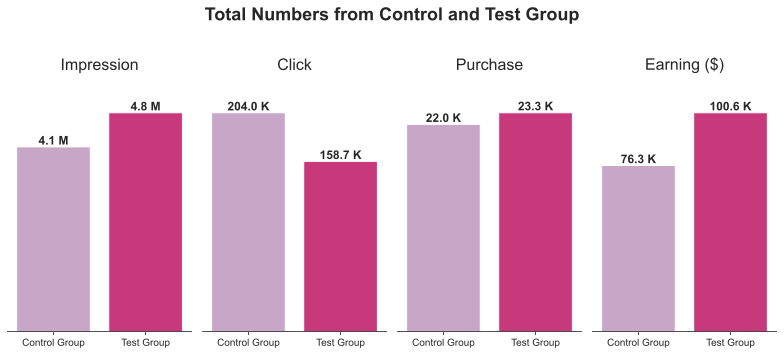

In [5]:
# Create a series for total impression, click, purchase and earning
total_impression = main_df.groupby('Group')['Impression'].sum()
total_click = main_df.groupby('Group')['Click'].sum()
total_purchase = main_df.groupby('Group')['Purchase'].sum()
total_earning = main_df.groupby('Group')['Earning'].sum()

# Create subplots figure
fig, axs = plt.subplots(1, 4, figsize=(11, 5))

# Create a list for the plotted data
plot_data = [(axs[0], total_impression, 'Impression\n'),
             (axs[1], total_click, 'Click\n'),
             (axs[2], total_purchase, 'Purchase\n'),
             (axs[3], total_earning, 'Earning ($)\n')]

# Loops for applying the bar_plot function from the viz module
for i, (ax, df, title) in enumerate(plot_data):
    viz.bar_plot(ax, df.index, df.values, '', '', 'PuRd', 12)
    viz.despine_subplot(ax)
    ax.set_title(title, fontsize=16, pad=15)

    # Set ticks for each bar value
    for bar, value in zip(ax.patches, df.values): 
        value = viz.numeric_formatter(value, bar)
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 15, value, ha='center', va='bottom', fontweight='bold', fontsize=12)

# Set the main title
plt.suptitle('Total Numbers from Control and Test Group\n', fontsize=18, fontweight='bold')

plt.tight_layout()

plt.savefig("img/total_numbers.svg", bbox_inches='tight')

2. **How the distribution of the data from each group?**

    - We visualize the distribution using an ECDF (Empirical Cumulative Distribution Function) plot as an alternative to a histogram or KDE (Kernel Density Estimation) plot

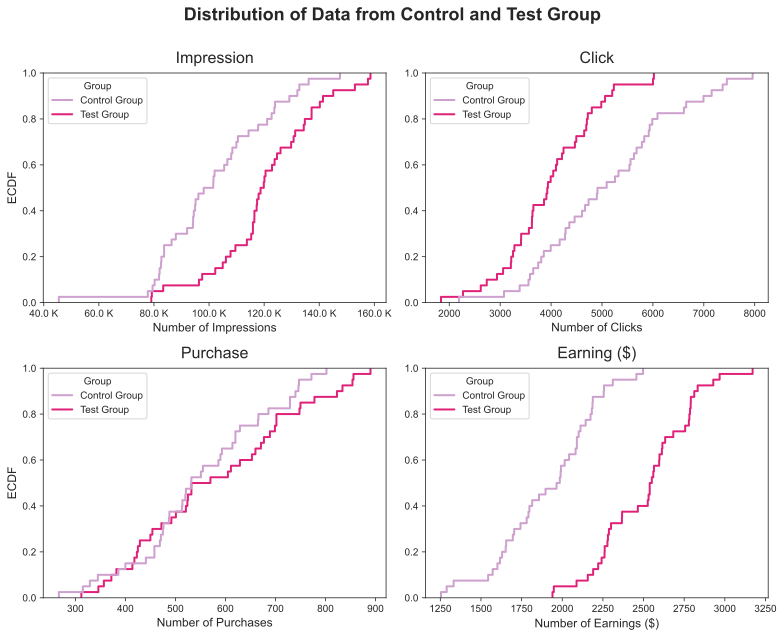

In [6]:
# Create the subplots figure
fig, axs = plt.subplots(2, 2, figsize=(11, 9))

# Make a list for the plotted data
plot_data = [(axs[0, 0], 'Impression', 'Number of Impressions', 'ECDF', 'Impression'),
             (axs[0, 1], 'Click', 'Number of Clicks', '', 'Click'),
             (axs[1, 0], 'Purchase', 'Number of Purchases', 'ECDF', 'Purchase'),
             (axs[1, 1], 'Earning', 'Number of Earnings ($)', '', 'Earning ($)')]

# Loops and use ecdf_plot function from viz module
for i, (ax, column, xlabel, ylabel, title) in enumerate(plot_data):
    viz.ecdf_plot(ax,  main_df[column], main_df['Group'].sort_values(ascending=True), xlabel, ylabel, 'PuRd', 12)
    ax.set_title(title, fontsize=16, pad=10)

# Set the main title
plt.suptitle('Distribution of Data from Control and Test Group\n', fontsize=18, fontweight='bold')

plt.tight_layout()

plt.savefig("img/data_distribution.svg", bbox_inches='tight')

3. **What are the descriptive statistics for the data in each group?**

    - The most effective way to visualize summary statistics is by using a box plot

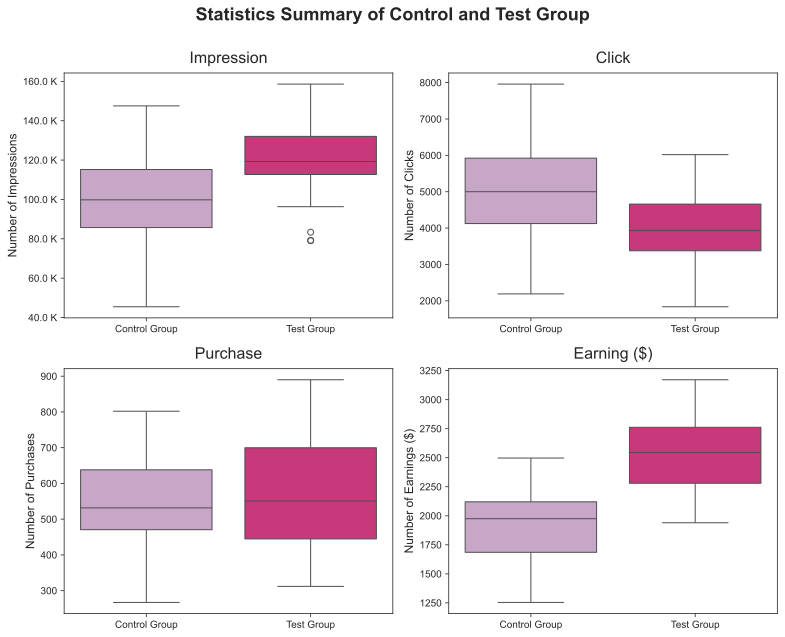

In [7]:
# Create the subplots figure
fig, axs = plt.subplots(2, 2, figsize=(11, 9))

# Make a list of the plotted data
plot_data = [(axs[0, 0], 'Impression', 'Number of Impressions', 'Impression'),
             (axs[0, 1], 'Click', 'Number of Clicks', 'Click'),
             (axs[1, 0], 'Purchase', 'Number of Purchases', 'Purchase'),
             (axs[1, 1], 'Earning', 'Number of Earnings ($)', 'Earning ($)')]

# Call the ecdf_plot function from viz module
for i, (ax, ycolumn, ylabel, title) in enumerate(plot_data):
    viz.box_plot(ax, main_df['Group'], main_df[ycolumn], '', ylabel, 'PuRd', 12)
    ax.set_title(title, fontsize=16, pad=10)

# Set the main title
plt.suptitle('Statistics Summary of Control and Test Group\n', fontsize=18, fontweight='bold')

plt.tight_layout()

plt.savefig("img/statistics_summary.svg", bbox_inches='tight')

4. **What are the Click-Through-Rate (CTR) and Conversion rates for each group?**

    - Click-through rate is measured by the number of ads-clicks per impression or ads-views
    - Conversion rate is measured by the number of purchases per ads-clicked

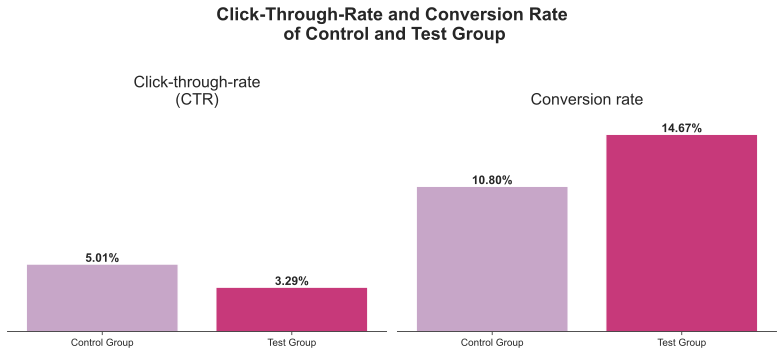

In [8]:
# Calculate the total CTR and total conversion
total_ctr = (main_df.groupby(["Group"])["Click"].sum() / main_df.groupby(["Group"])["Impression"].sum()) * 100
total_conversion = (main_df.groupby(["Group"])["Purchase"].sum() / main_df.groupby(["Group"])["Click"].sum()) * 100

fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharey=True)

plot_data = [(axs[0], total_ctr, 'Click-through-rate\n(CTR)'),
             (axs[1], total_conversion, 'Conversion rate')]

# Visualize with bar_plot function from viz module
for i, (ax, df, title) in enumerate(plot_data):
    viz.bar_plot(ax, df.index, df.values, '', '', 'PuRd', 12)
    viz.despine_subplot(ax)
    ax.set_title(title, pad=20, fontsize=16)
        
    for bar, value in zip(ax.patches, df.values):
        value = '{:.2f}%'.format(value)
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set the main title
plt.suptitle('Click-Through-Rate and Conversion Rate\n of Control and Test Group\n', fontsize=18, fontweight='bold')

plt.tight_layout()

plt.savefig("img/ctr_and_conversion.svg", bbox_inches='tight')

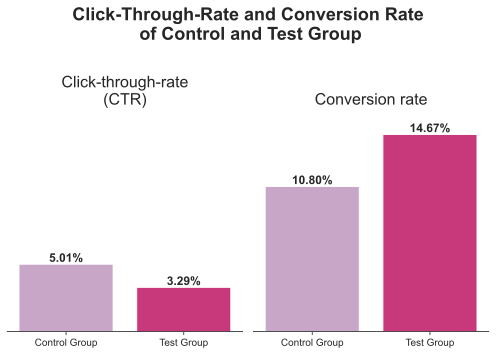

In [9]:
# Calculate the total CTR and total conversion
total_ctr = (main_df.groupby(["Group"])["Click"].sum() / main_df.groupby(["Group"])["Impression"].sum()) * 100
total_conversion = (main_df.groupby(["Group"])["Purchase"].sum() / main_df.groupby(["Group"])["Click"].sum()) * 100

fig, axs = plt.subplots(1, 2, figsize=(7, 5), sharey=True)

plot_data = [(axs[0], total_ctr, 'Click-through-rate\n(CTR)'),
             (axs[1], total_conversion, 'Conversion rate')]

# Visualize with bar_plot function from viz module
for i, (ax, df, title) in enumerate(plot_data):
    viz.bar_plot(ax, df.index, df.values, '', '', 'PuRd', 12)
    viz.despine_subplot(ax)
    ax.set_title(title, pad=20, fontsize=16)
        
    for bar, value in zip(ax.patches, df.values):
        value = '{:.2f}%'.format(value)
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set the main title
plt.suptitle('Click-Through-Rate and Conversion Rate\n of Control and Test Group\n', fontsize=18, fontweight='bold')

plt.tight_layout()

plt.savefig("img/ctr_and_conversion.svg", bbox_inches='tight')

5. **How does the trend in CTR and Conversion rate vary for each group?**

    - For visualizing time-series data, a line plot is a must

In [ ]:
# Add CTR and Conversion column to our dataframe
main_df['CTR'] = main_df['Click'] / main_df['Impression']
main_df['Conversion'] = main_df['Purchase'] / main_df['Click']

# Create new dataframes which are trend from ctr and conversion rate
ctr_trend = main_df.groupby(['Group', 'Date'])['CTR'].sum().unstack().T
conversion_trend = main_df.groupby(['Group', 'Date'])['Conversion'].sum().unstack().T

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(11, 9), sharex=True)

# Create custom_x_ticks based on the desired months
custom_x_ticks = [datetime(2022, i, 1, 0, 0) for i in range(1, 13, 1)]

plot_data =[(axs[0], ctr_trend, 'Control Group', '#B15EFF', 'o', 'solid', 3, 'Control Group'),
            (axs[0], ctr_trend, 'Test Group', '#DA0C81', 'X', 'dotted', 2, 'Test Group'),
            (axs[1], conversion_trend, 'Control Group', '#B15EFF', 'o', 'solid', 3, 'Control Group'),
            (axs[1], conversion_trend, 'Test Group', '#DA0C81', 'X', 'dotted', 2, 'Test Group')]


for i, (ax, df, ycolumn, color, marker, linestyle, linewidth, label) in enumerate(plot_data):
    viz.line_plot(ax, df.index, df[ycolumn], color, marker, linestyle, linewidth, label, 12)
    ax.set_xticks(custom_x_ticks)
    ax.set_xticklabels([dt.strftime('%B %Y') for dt in custom_x_ticks], rotation=30)


axs[0].set_ylabel('Click-Trough-Rate\n(CTR)', fontsize=12)

axs[1].set_ylabel('Conversion Rate', fontsize=12)

axs[1].set_xlabel('')

# Set main title
plt.suptitle('Click-Through-Rate and Conversion Rate Trend\n', fontsize=18, fontweight='bold')

plt.tight_layout()

plt.savefig("img/ctr_and_conversion_trend.svg", bbox_inches='tight')

<a id='ab'></a>
### A/B Testing ~

- In this section, our objectives are as follows:

    - Generate bootstrap samples for the Control and Test Groups with sample sizes identical to the original dataset
    - Calculate the difference in "converted" probabilities between these samples
    - Create a sampling distribution of this difference through 10,000 iterations
    - Perform a hypothesis test to assess the significance of the difference in "converted" probabilities between the two groups
    - Do the test for click-through-rate, conversion rate and earning

1. **Click-through-rate (CTR)**

    - As we observed in the Data Exploration section, the Click-through-rate (CTR) for the Control Group is higher than that of the Test Group. We will now determine if this difference is statistically significant.
    > **Null Hypothesis (H0):**
    > P(Control Group) - P(Test Group) <= 0 $$H_0: P(control) - P(test)  \leq 0 $$
    > 
    > **Alternative Hypothesis (HA):**
    > P(Control Group) - P(Test Group) > 0  $$H_A: P(control) - P(test) > 0 $$ 

dadda
> **Null Hypothesis (H0):**
    > $$H_0: P(control) - P(test)  \leq 0 $$
    > 
    > **Alternative Hypothesis (HA):**
    > $$H_A: P(control) - P(test) > 0 $$ 

In [ ]:
# Retrieve ctr data from total_ctr for each group
control_ctr = total_ctr['Control Group']
test_ctr = total_ctr['Test Group']


observed_ctr_diff = control_ctr - test_ctr

In [ ]:
# Create empty list
ctr_diff = []

for i in range(10000):
    boostrap_sample = main_df.sample(main_df.shape[0], replace=True)

    control_impression_sample = boostrap_sample.loc[boostrap_sample['Group'] == 'Control Group']['Impression'].sum()
    control_click_sample = boostrap_sample.loc[boostrap_sample['Group'] == 'Control Group']['Click'].sum() 
    control_ctr_sample = control_click_sample / control_impression_sample * 100

    test_impression_sample = boostrap_sample.loc[boostrap_sample['Group'] == 'Test Group']['Impression'].sum()
    test_click_sample = boostrap_sample.loc[boostrap_sample['Group'] == 'Test Group']['Click'].sum()
    test_ctr_sample = test_click_sample / test_impression_sample * 100

    ctr_diff.append(control_ctr_sample - test_ctr_sample)

# Change into array
ctr_diff = np.array(ctr_diff)

In [ ]:
# Find the 2.5 and 97.5 percentile for 95% confidence level
low_bound = np.percentile(ctr_diff, 2.5)
high_bound = np.percentile(ctr_diff, 97.5)
null_values = np.random.normal(0, ctr_diff.std(), ctr_diff.shape)


# Create subplots figure
fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharey=True)

plot_data = [(axs[0], ctr_diff, 'Count', '#BC7AF9', 'Sampling Distribution by Confidence Interval 95%'),
             (axs[1], null_values, '', '#DA0C81', 'Normal Distribution under the Null Hypothesis')]

for i, (ax, df, ylabel, color, title) in enumerate(plot_data):
    viz.hist_plot(ax, df, '', ylabel, color, 12)
    ax.set_title(title, pad=15, fontsize=14)
    ax.set_xticklabels(['{:.1f}'.format(ticks) for ticks in ax.get_xticks()])

# Thearces are hand,
axs[0].axvline(x= low_bound, color= '#FFB000', linewidth= 3, linestyle='dashed')
axs[0].axvline(x= high_bound, color= '#FFB000', linewidth= 3, linestyle='dashed')
axs[0].axvline(0, color= '#DA0C81', linewidth= 2)
axs[1].axvline(observed_ctr_diff, c="#BC7AF9", linewidth=3)

# Set the main title
plt.suptitle('Click-Trough-Rate (CTR) Difference Distribution\nBetween Control and Test Group', fontsize=18, fontweight='bold')

plt.tight_layout()


plt.savefig("img/ctr_difference_distribution.svg", bbox_inches='tight')

In [ ]:
# Find the p-value
p_value = (null_values > observed_ctr_diff).mean()

# Define the significance level (alpha)
alpha = 0.05

# Print the first model
print(' Click-through-rate (CTR) Difference  Hypothesis Test '.center(100, '='))
print('\n+ Hypothesis testing +')
print('\nNull Hypothesis (H0):  P(Control Group) - P(Test Group) <= 0')
print('Alternative Hypothesis (HA) :P(Control Group) - P(Test Group) > 0 ')
print('\n+ Sampling Distribution +')
print(f'\n{"   At 95% Confidence Interval:":<30}{low_bound:>15.5f} %{"to":>5}{high_bound:>10.5f} %')
print('\n+ Result +')
if p_value < alpha:
    print("\nReject the Null Hypothesis (H0) \n=> The Test Group's performance is significantly superior to the Control Group's performance")
else:
    print("\nFail to reject the null hypothesis(H0) \nNo significant statistical difference between the two groups, and any disparity observed is likely due to random chance")

2. **Conversion rate**

    - Conversion rate for Test Group is much higher than Control Group, so we will now assess whether this difference is statistically significant.
    > **Null Hypothesis (H0):**
    > P(Test Group) - P(Control Group) <= 0 $$H_0: P(test) - P(control)  \leq 0 $$
    > 
    > **Alternative Hypothesis (HA):**
    > P(Test Group) - P(Control Group) > 0  $$H_A: P(test) - P(control) > 0 $$ 

In [ ]:
# Retrieve conversion data from total_conversion for each group
control_conversion = total_conversion['Control Group']
test_conversion = total_conversion['Test Group']

observed_conversion_diff = test_conversion - control_conversion

In [ ]:
conversion_diff = []

for i in range(10000):
    boostrap_sample = main_df.sample(main_df.shape[0], replace=True)

    control_purchase_sample = boostrap_sample.loc[boostrap_sample['Group'] == 'Control Group']['Purchase'].sum()
    control_click_sample = boostrap_sample.loc[boostrap_sample['Group'] == 'Control Group']['Click'].sum()
    control_conversion_sample = control_purchase_sample / control_click_sample * 100

    test_purchase_sample = boostrap_sample.loc[boostrap_sample['Group'] == 'Test Group']['Purchase'].sum()
    test_click_sample = boostrap_sample.loc[boostrap_sample['Group'] == 'Test Group']['Click'].sum()
    test_conversion_sample = test_purchase_sample / test_click_sample * 100

    conversion_diff.append(test_conversion_sample - control_conversion_sample)

conversion_diff = np.array(conversion_diff)

In [ ]:
# Find the 2.5 and 97.5 percentile for 95% confidence level
low_bound = np.percentile(conversion_diff, 2.5)
high_bound = np.percentile(conversion_diff, 97.5)
null_values = np.random.normal(0, conversion_diff.std(), conversion_diff.shape)


# Create subplots figure
fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharey=True)

plot_data = [(axs[0], conversion_diff, 'Count', '#BC7AF9', 'Sampling Distribution by Confidence Interval 95%'),
             (axs[1], null_values, '', '#DA0C81', 'Normal Distribution under the Null Hypothesis')]

for i, (ax, df, ylabel, color, title) in enumerate(plot_data):
    viz.hist_plot(ax, df, '', ylabel, color, 12)
    ax.set_title(title, pad=15, fontsize=14)
    ax.set_xticklabels(['{:.1f}'.format(ticks) for ticks in ax.get_xticks()])

# Thearces are hand,
axs[0].axvline(x= low_bound, color= '#FFB000', linewidth= 3, linestyle='dashed')
axs[0].axvline(x= high_bound, color= '#FFB000', linewidth= 3, linestyle='dashed')
axs[0].axvline(0, color= '#DA0C81', linewidth= 2)
axs[1].axvline(observed_conversion_diff, c="#BC7AF9", linewidth=3)

# Set the main title
plt.suptitle('Conversion Rate Difference Distribution\nBetween Control and Test Group', fontsize=18, fontweight='bold')

plt.tight_layout()


plt.savefig("img/conversion_difference_distribution.svg", bbox_inches='tight')

In [ ]:
# Find the p-value
p_value = (null_values > observed_conversion_diff).mean()

# Define the significance level (alpha)
alpha = 0.05

# Print the first model
print(' Conversion Rate Difference  Hypothesis Test '.center(100, '='))
print('\n+ Hypothesis testing +')
print('\nNull Hypothesis (H0):  P(Control Group) - P(Test Group) <= 0')
print('Alternative Hypothesis (HA) :P(Control Group) - P(Test Group) > 0 ')
print('\n+ Sampling Distribution +')
print(f'\n{"   At 95% Confidence Interval:":<30}{low_bound:>15.5f} %{"to":>5}{high_bound:>10.5f} %')
print('\n+ Result +')
if p_value < alpha:
    print("\nReject the Null Hypothesis (H0) \n=> The Test Group's performance is significantly superior to the Control Group's performance")
else:
    print("\nFail to reject the null hypothesis(H0) \nNo significant statistical difference between the two groups, and any disparity observed is likely due to random chance")

3. **Earning**

    - Earning for Test Group is higher beyond the Control Group, so we will now assess whether this difference is statistically significant
    > **Null Hypothesis (H0):**
    > P(Test Group) - P(Control Group) <= 0 $$H_0: P(test) - P(control)  \leq 0 $$
    > 
    > **Alternative Hypothesis (HA):**
    > P(Test Group) - P(Control Group) > 0  $$H_A: P(test) - P(control) > 0 $$ 

- Earning for Test Group is higher beyond the Control Group, so we will now assess whether this difference is statistically significant
    > **Null Hypothesis (H0):**
    >$$H_0: P(test) - P(control)  \leq 0 $$
    > 
    > **Alternative Hypothesis (HA):**
    >$$H_A: P(test) - P(control) > 0 $$ 

In [ ]:
control_earning = main_df.loc[main_df['Group'] == 'Control Group']['Earning'].mean()
test_earning = main_df.loc[main_df['Group'] == 'Test Group']['Earning'].mean()

observed_earning_diff = test_earning - control_earning

In [ ]:
earning_diff = []

for i in range(10000):
    b_sample = main_df.sample(main_df.shape[0], replace= True)
    
    samp_earning_cont= b_sample.loc[b_sample['Group']=='Control Group']["Earning"].mean()
    samp_earning_test= b_sample.loc[b_sample['Group']=='Test Group']["Earning"].mean()
    
    earning_diff.append(samp_earning_test - samp_earning_cont)

In [ ]:
earning_diff = np.array(earning_diff) # convert to numpy array

low_bound = np.percentile(earning_diff, 2.5)
high_bound = np.percentile(earning_diff, 97.5)
null_values = np.random.normal(0, earning_diff.std(), earning_diff.shape)

# Create subplots figure
fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharey=True)

plot_data = [(axs[0], earning_diff, 'Count', '#BC7AF9', 'Sampling Distribution by Confidence Interval 95%'),
             (axs[1], null_values, '', '#DA0C81', 'Normal Distribution under the Null Hypothesis')]

for i, (ax, df, ylabel, color, title) in enumerate(plot_data):
    viz.hist_plot(ax, df, '', ylabel, color, 12)
    ax.set_title(title, pad=15, fontsize=14)

# Thearces are hand,
axs[0].axvline(x= low_bound, color= '#FFB000', linewidth= 3, linestyle='dashed')
axs[0].axvline(x= high_bound, color= '#FFB000', linewidth= 3, linestyle='dashed')
axs[0].axvline(0, color= '#DA0C81', linewidth= 2)
axs[1].axvline(observed_earning_diff, c="#BC7AF9", linewidth=3)

# Set the main title
plt.suptitle('Earnings Difference Distribution\nBetween Control and Test Group', fontsize=18, fontweight='bold')

plt.tight_layout()

plt.savefig("img/earnings_difference_distribution.svg", bbox_inches='tight')

In [ ]:
# Find the p-value
p_value = (null_values > observed_earning_diff).mean()

# Define the significance level (alpha)
alpha = 0.05

# Print the first model
print(' Earnings Difference  Hypothesis Test '.center(100, '='))
print('\n+ Hypothesis testing +')
print('\nNull Hypothesis (H0):  P(Control Group) - P(Test Group) <= 0')
print('Alternative Hypothesis (HA) :P(Control Group) - P(Test Group) > 0 ')
print('\n+ Sampling Distribution +')
print(f'\n{"   At 95% Confidence Interval:":<30}{"$":>10}{low_bound:.5f}{"to":>5}{"$":>5}{high_bound:.5f}')
print('\n+ Result +')
if p_value < alpha:
    print("\nReject the Null Hypothesis (H0) \n=> The Test Group's performance is significantly superior to the Control Group's performance")
else:
    print("\nFail to reject the null hypothesis(H0) \nNo significant statistical difference between the two groups, and any disparity observed is likely due to random chance")

<a id='takeaway'></a>
### Key Takeaways ~

Here are the key findings and insights:

- **Average Bidding appears to be more effective in terms of impressions, purchases, and earnings, while Maximum Bidding performs better in generating ad clicks**

- **Maximum Bidding demonstrates a significant superior Click-through rate (CTR) compared to Average Bidding**

- **On the other hand, Average Bidding significantly outperforms Maximum Bidding in conversion rate and earnings**

These insights underline the flexibility of different bidding strategies, allowing advertisers to fine-tune their approach to achieve their desired performance outcomes. By carefully selecting the bidding strategy, advertisers can optimize their campaigns and maximize their returns on investment


<a id='reference'></a>
### References ~
Check out the following resources to learn more about the datasets and tools/libraries used in this project:

- **Datasets**:
  
  - Optimizing Ad Bidding | Facebook's A/B Test Story : https://kaggle.com/datasets/furth3r/facebook-ab-test-of-bidding-feature

>
- **Libraries**: 
  
  - Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
  - Seaborn user guide: https://seaborn.pydata.org/tutorial.html
  - opendataset Python library: https://github.com/JovianML/opendatasets
  - SciPy user guide : https://docs.scipy.org/doc/scipy/tutorial/index.html

>
- **Further Reading**

  - Facebook Ads Auction Explained: https://web.facebook.com/business/ads/ad-auction?_rdc=1&_rdr